Name: Atharv Deshmukh
Rollno.: 21102B0053
BE CMPN B

---
Experiment 1 : Predicting Housing Prices using Linear Regression

---
Github :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [ ]:
housing = pd.read_csv(r"/content/housing.csv")

Data Preprocessing

In [ ]:
print(housing.head(10))


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

In [ ]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(housing.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [ ]:
print(housing.nunique())

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64


In [ ]:
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
housing['total_bedrooms'].fillna(method='ffill', inplace=True)
print(housing.isnull().sum())
print(housing.duplicated().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
0


Visualization

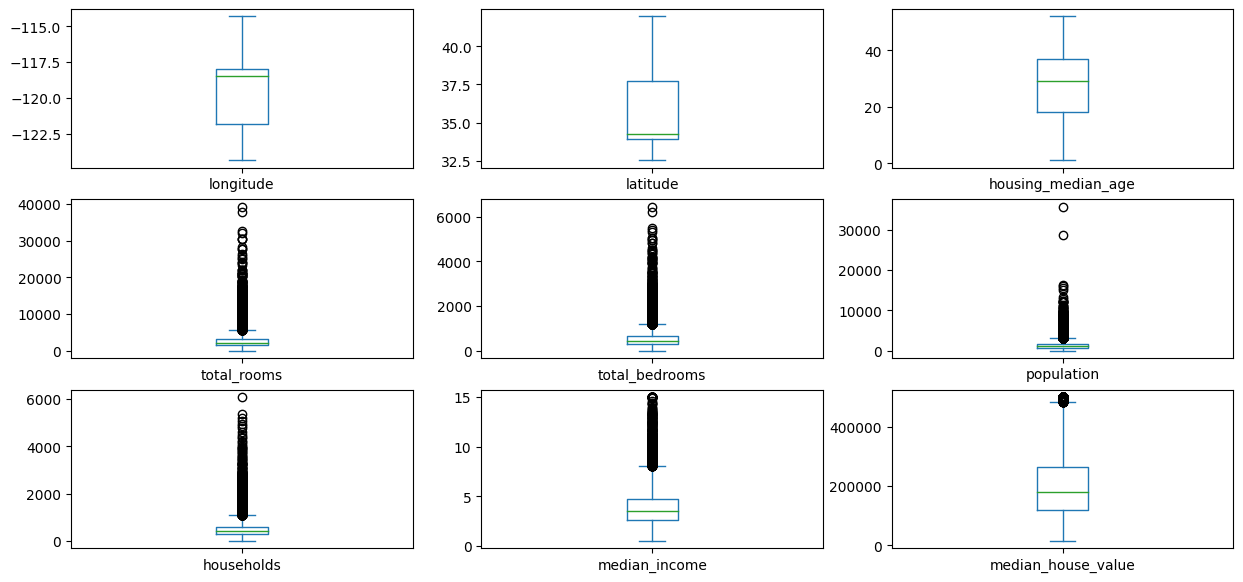

In [ ]:
housing.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [ ]:
housing1 = housing.copy()
for col in ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']:
    housing1 = housing1[housing1[col] < housing1[col].quantile(0.9)]

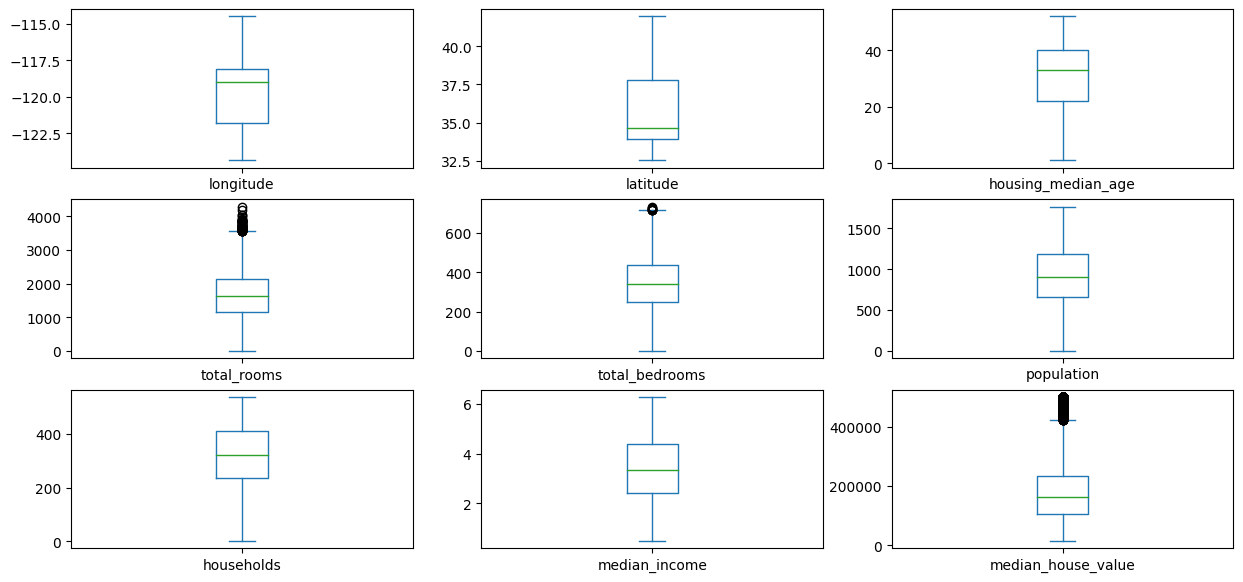

In [ ]:
housing1.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

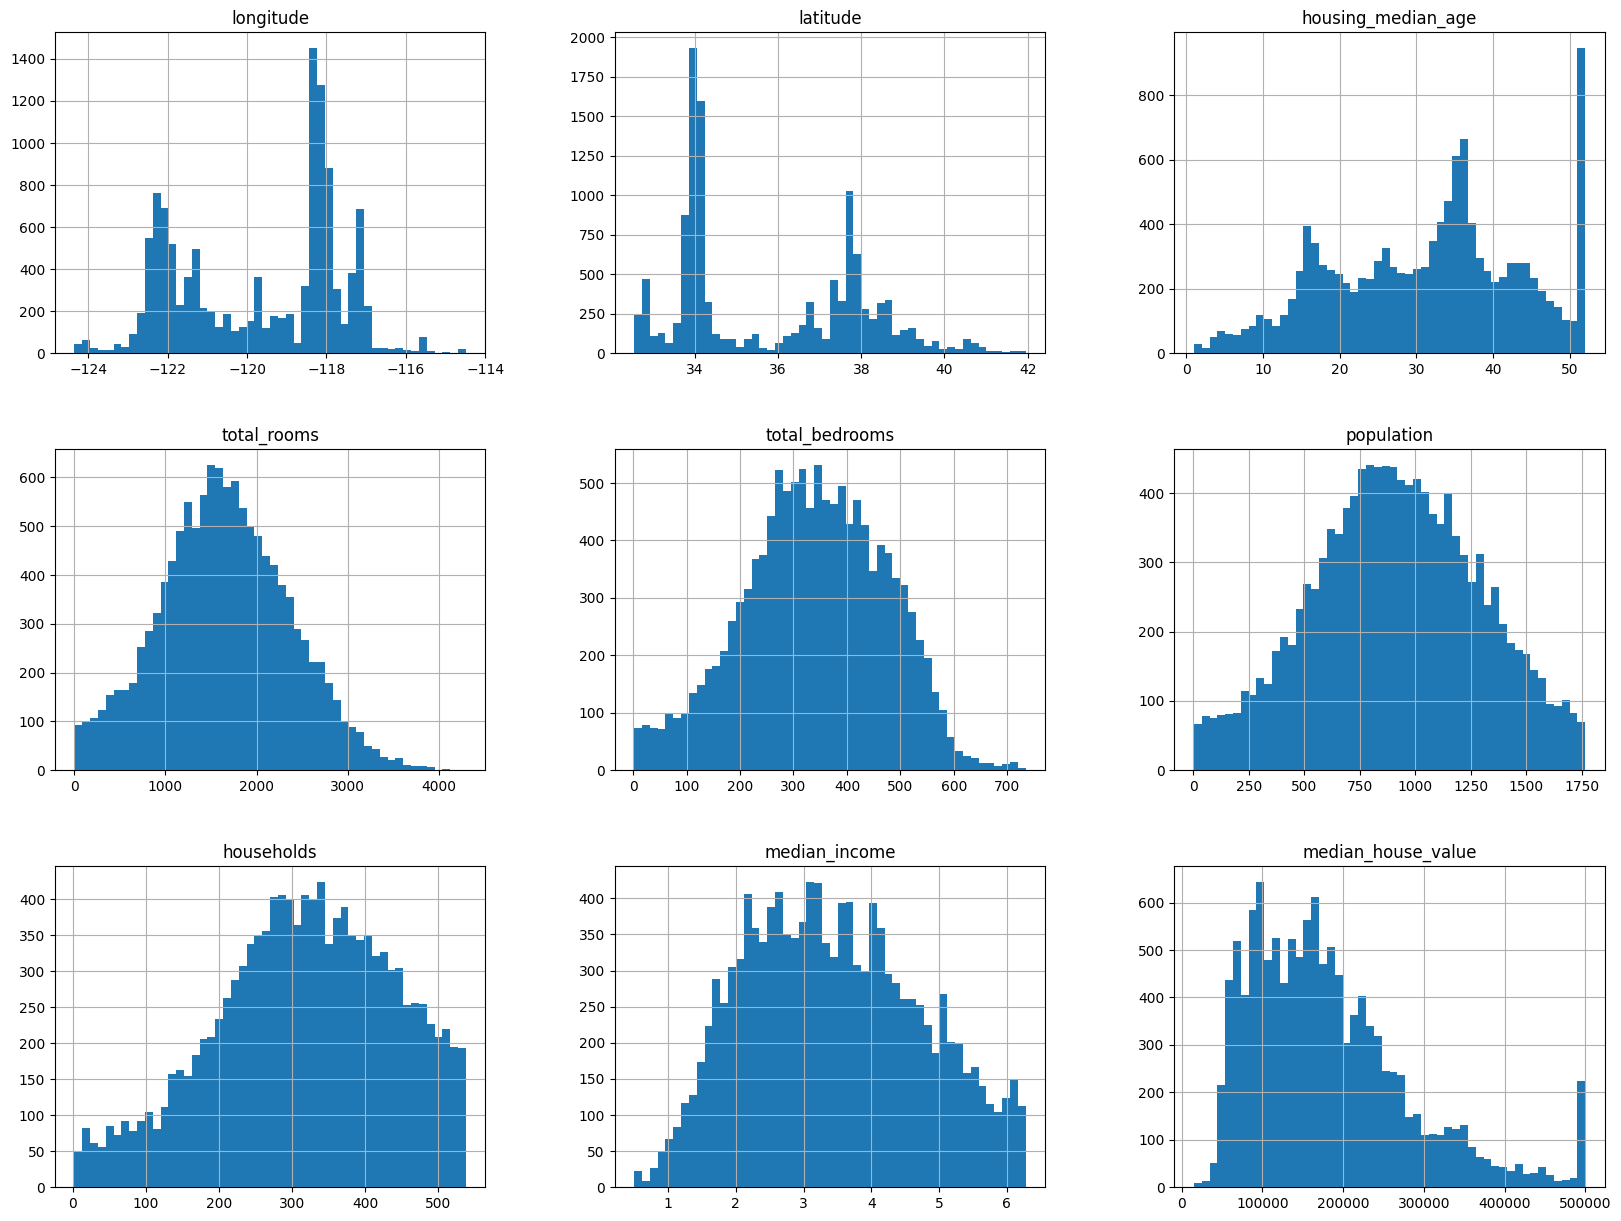

In [ ]:
housing1.hist(bins=50, figsize=(20,15))
plt.show()

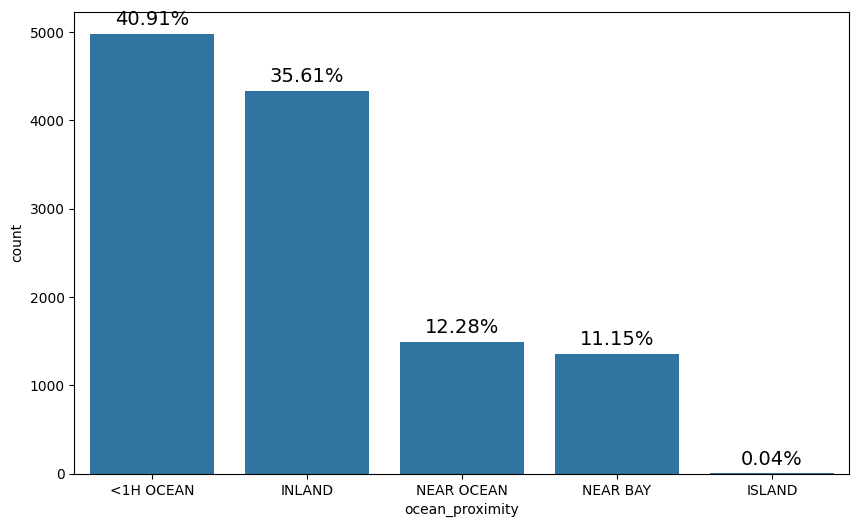

In [ ]:
ocean_values = housing1["ocean_proximity"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x="ocean_proximity", data=housing1, order=ocean_values.index)
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt = '{:0.2f}%'.format(100 * count / housing1.shape[0])
    plt.text(i, count + 100, strt, ha='center', color='black', fontsize=14)
plt.show()

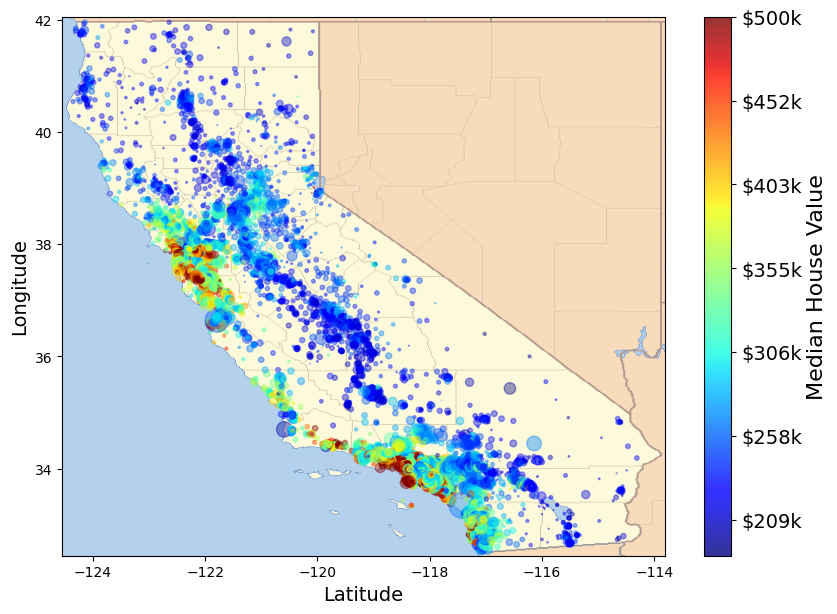

In [ ]:
import urllib.request
import io
import matplotlib.image as mpimg

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
with urllib.request.urlopen(url) as url_request:
    image_data = url_request.read()

image_data = io.BytesIO(image_data)
california_img = mpimg.imread(image_data, format='png')

ax = housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7), s=housing['population']/100,
                  c='median_house_value', colorbar=False, cmap=plt.get_cmap('jet'), alpha=0.4)
plt.imshow(california_img, alpha=0.8, extent=[-124.55, -113.80, 32.45, 42.05], cmap=plt.get_cmap('jet'))
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.show()

Model Generation

In [ ]:
df = housing[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('Cross-validation RMSE:', np.sqrt(-scores).mean())

Cross-validation RMSE: 75917.02514172823


In [ ]:
print('Train score:', pipeline.score(X_train, y_train))
print('Test score:', pipeline.score(X_test, y_test))

Train score: 0.5700818543102877
Test score: 0.5420853869482856


In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print('R2 score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


R2 score: 0.5420853869482856
Mean Absolute Error: 56836.05528278542
Mean Squared Error: 6000554202.106741
